Considere a equação

$x − 2 \sin{x} = 0$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: x - 2 * np.sin(x)

# Questão 1

Mostre que essa equação possui três raízes. Determine três intervalos, cada um contendo uma única raiz da equação.

Avaliando a função $f(x) = x - 2 \times \sin{x}$ para os valores $x = -\frac{2 \pi}{3}$, $x = -\frac{\pi}{6}$, $x = \frac{\pi}{6}$ e $x = \frac{2 \pi}{3}$, encontrei:

* $f\left(-\frac{2 \pi}{3}\right) \approx -0.36$
* $f\left(-\frac{\pi}{6}\right) \approx 0.48$
* $f\left(\frac{\pi}{6}\right) \approx -0.48$
* $f\left(\frac{2 \pi}{3}\right) \approx 0.36$

Dessa forma, pelo Teorema do Valor Intermediário, segue que a função apresenta ao menos três raízes, cada uma contida em um intervalo:

* $\left[ -\frac{2 \pi}{3},  -\frac{\pi}{6} \right]$
* $\left[ -\frac{\pi}{6},  \frac{\pi}{6} \right]$
* $\left[ \frac{\pi}{6},  \frac{2 \pi}{3} \right]$

In [2]:
f(-2/3 * np.pi), f(-1/6 * np.pi), f(1/6 * np.pi), f(2/3 * np.pi)

(-0.36234429482431785,
 0.4764012244017011,
 -0.4764012244017011,
 0.36234429482431785)

# Questão 2

Determine as três raízes da equação acima usando os métodos da bissecção e da posição falsa. Compare os dois métodos com respeito ao número de iterações efetuadas.

In [3]:
limites = [-2/3 * np.pi, -1/6 * np.pi, 1/6 * np.pi, 2/3 * np.pi]

## Método da Bissecção

$m = \frac{a+b}{2}$

In [4]:
def MetodoBisseccao(f,a,b,tau=1.e-6,epsilon=1.e-6):
    fa, fb = f(a), f(b)
    if fa * fb >= 0:
        print("Não é possivel garantir uma raiz no intervalo dado.")
        return
    # Calcular o ponto médio.
    m = (a + b) / 2
    fm = f(m)
    cont = 0
    print("Iteração(%02d): (%2.2f,%2.2f)" %(cont,a,b))
    while (b - a > 2 * tau)  and  (np.abs(fm) > epsilon):
        cont += 1
        if np.sign(fm) * np.sign(fb) < 0:
            a = m
            fa = fm
        else:
            b = m
            fb = fm
        m = (a + b) / 2
        fm = f(m)
        print("Iteração(%02d): (%2.2f,%2.2f)" %(cont,a,b))
    return m

In [5]:
raizesMB = list()

for i in range((len(limites)) - 1):
    raiz = MetodoBisseccao(f, limites[i], limites[i+1])
    print(raiz, "\n")
    raizesMB.append(raiz)

Iteração(00): (-2.09,-0.52)
Iteração(01): (-2.09,-1.31)
Iteração(02): (-2.09,-1.70)
Iteração(03): (-1.90,-1.70)
Iteração(04): (-1.90,-1.80)
Iteração(05): (-1.90,-1.85)
Iteração(06): (-1.90,-1.87)
Iteração(07): (-1.90,-1.89)
Iteração(08): (-1.90,-1.89)
Iteração(09): (-1.90,-1.89)
Iteração(10): (-1.90,-1.89)
Iteração(11): (-1.90,-1.89)
Iteração(12): (-1.90,-1.90)
Iteração(13): (-1.90,-1.90)
Iteração(14): (-1.90,-1.90)
Iteração(15): (-1.90,-1.90)
Iteração(16): (-1.90,-1.90)
Iteração(17): (-1.90,-1.90)
Iteração(18): (-1.90,-1.90)
Iteração(19): (-1.90,-1.90)
-1.8954944196671053 

Iteração(00): (-0.52,0.52)
0.0 

Iteração(00): (0.52,2.09)
Iteração(01): (1.31,2.09)
Iteração(02): (1.70,2.09)
Iteração(03): (1.70,1.90)
Iteração(04): (1.80,1.90)
Iteração(05): (1.85,1.90)
Iteração(06): (1.87,1.90)
Iteração(07): (1.89,1.90)
Iteração(08): (1.89,1.90)
Iteração(09): (1.89,1.90)
Iteração(10): (1.89,1.90)
Iteração(11): (1.89,1.90)
Iteração(12): (1.90,1.90)
Iteração(13): (1.90,1.90)
Iteração(14): (1.90,1

In [6]:
f(raizesMB)

array([-2.50019956e-07,  0.00000000e+00,  2.50019956e-07])

## Método da Posição Falsa

$m = b - \frac{f(b)}{d}$, em que $d = \frac{f(b) - f(a)}{b - a}$

In [7]:
def MetodoPosicaoFalsa(f,a,b,tau=1.e-6,epsilon=1.e-6):
    fa = f(a)
    fb = f(b)
    if fa * fb >= 0:
        print("Não é possivel garantir uma raiz no intervalo dado.")
        return
    # Calcular o ponto médio.
    d = (fb - fa) / (b - a)
    m = b - fb/d
    fm = f(m)
    count = 0
    print("Iteração(%02d): (%2.2f,%2.2f)" % (count,a,b))
    while (b - a > 2 * tau)  and  (np.abs(fm) > epsilon):
        count += 1
        if np.sign(fm) * np.sign(fb) < 0:
            a = m
            fa = fm
        else:
            b = m
            fb = fm
        d = (fb - fa) / (b - a)
        m = b - fb/d
        fm = f(m)
        print("Iteração(%02d): (%2.2f,%2.2f)" % (count,a,b))
    return m

In [8]:
raizesPF = list()

for i in range((len(limites)) - 1):
    raiz = MetodoPosicaoFalsa(f, limites[i], limites[i+1])
    print(raiz, "\n")
    raizesPF.append(raiz)

Iteração(00): (-2.09,-0.52)
Iteração(01): (-2.09,-1.42)
Iteração(02): (-2.09,-1.83)
Iteração(03): (-2.09,-1.89)
Iteração(04): (-2.09,-1.89)
Iteração(05): (-2.09,-1.90)
Iteração(06): (-2.09,-1.90)
Iteração(07): (-2.09,-1.90)
-1.8954941924170243 

Iteração(00): (-0.52,0.52)
0.0 

Iteração(00): (0.52,2.09)
Iteração(01): (1.42,2.09)
Iteração(02): (1.83,2.09)
Iteração(03): (1.89,2.09)
Iteração(04): (1.89,2.09)
Iteração(05): (1.90,2.09)
Iteração(06): (1.90,2.09)
Iteração(07): (1.90,2.09)
1.8954941924170243 



In [9]:
f(raizesPF)

array([ 1.22225931e-07,  0.00000000e+00, -1.22225931e-07])

## Comparação entre Métodos

Os dois métodos obtiveram aproximações corretas, com precisão aceitável.

O número de iterações variou: Para as raízes de menor e maior valor, o método da Bisecção efetuou 19 iterações, enquanto o método da Posição Falsa iterou 7 vezes. Ou seja, o segundo método necessitou de menos iterações.

Para a raiz de valor mediano, os dois métodos efetuaram zero iteração, de forma que não precisaram recalcular $m$.

Possivelmente, a similaridade no comportamento dos métodos para as raízes menor e maior, bem como a necessidade de nenhuma iteração para a raiz mediana, foram resultados da escolha de limites simétricos para os intervalos e da distribuição simétrica das raízes da função.

# Questão 3

Determine um invervalo que garante a convergência do método do ponto fixo definido por 
$x^{(k+1)} = 2 sen\left(x^{(k)} \right)$, com $k = 0, 1, \dots $, para a raiz positiva da equação dada.

Vamos aplicar o Teorema do Ponto Fixo.

A função $\varphi(x)$ é dada por $\varphi(x) = 2 \sin x$.

Assim, $\varphi'(x) = 2 \cos x$.

Consequentemente, para que $\varphi'(x) < 1$, é necessário que $2 \cos x < 1 \iff \cos x < \frac{1}{2}$.

Pensando no ciclo trigonométrico, $\cos x$ começa em $1$ para $x = 0$, e é decrescente até $x = \pi$. Como $\cos \frac{\pi}{3} = \frac{1}{2}$, temos que o intervalo $\left( \frac{\pi}{3}, \pi\right]$ garante convergência. Como $\cos \pi = -1$, $\cos x$ é crescente para $\pi < x < 2 \pi$ e $\cos \frac{5 \pi}{3} = \frac{1}{2}$, a seção $\left[ \pi, \frac{5\pi}{3}\right)$ também garante convergência.

Logo, o intervalo $\left( \frac{\pi}{3}, \frac{5\pi}{3} \right)$ garante a convergência do método do ponto fixo definido por $x^{(k+1)} = 2 sen\left(x^{(k)} \right)$.

O resultado abaixo mostra um exemplo de valor no intervalo que converge.

In [10]:
def MetodoPontoFixo(phi,x0,kmax=100,tau=1.e-6):
    k = 0
    Er = [tau + 1]
    while (k <= kmax)  and  (Er[-1] > tau):
        k += 1
        x = phi(x0)
        Er.append( np.abs(x - x0) )
        print("Iteração(%02d): (%2.2f)" %(k, x0))
        x0 = x
    return x, Er

phi = lambda x: 2 * np.sin(x)

In [11]:
x, Er = MetodoPontoFixo(phi, np.pi/3 + 1e-5)

Iteração(01): (1.05)
Iteração(02): (1.73)
Iteração(03): (1.97)
Iteração(04): (1.84)
Iteração(05): (1.93)
Iteração(06): (1.87)
Iteração(07): (1.91)
Iteração(08): (1.89)
Iteração(09): (1.90)
Iteração(10): (1.89)
Iteração(11): (1.90)
Iteração(12): (1.89)
Iteração(13): (1.90)
Iteração(14): (1.89)
Iteração(15): (1.90)
Iteração(16): (1.90)
Iteração(17): (1.90)
Iteração(18): (1.90)
Iteração(19): (1.90)
Iteração(20): (1.90)
Iteração(21): (1.90)
Iteração(22): (1.90)
Iteração(23): (1.90)
Iteração(24): (1.90)
Iteração(25): (1.90)
Iteração(26): (1.90)
Iteração(27): (1.90)
Iteração(28): (1.90)
Iteração(29): (1.90)
Iteração(30): (1.90)


In [12]:
x, f(x)

(1.8954945500434022, 4.635822570264736e-07)

# Questão 4

Apresente uma iteração de ponto fixo que converge para a raiz $ξ = 0$ da equação $x − 2 \sin(x) = 0$.

Reorganizando $x − 2 \sin(x) = 0$, obtive $2 \sin(x) = x \iff \sin(x) = \frac{x}{2} \iff x = \arcsin \frac{x}{2}$.

Ou seja, temos $x^{(k+1)} = \varphi_2 \left(x^{(k)}\right) = \arcsin \frac{\left(x^{(k)}\right)}{2}$

Aplico o Teorema do Ponto Fixo para identificar um intervalo.

$\varphi_2'(x) = \frac{1}{\sqrt{4 - x^2}}$

Consequentemente, para que $\varphi_2'(x) < 1$, é necessário que $\frac{1}{\sqrt{4 - x^2}} < 1 \iff 1 < \sqrt{4 - x^2} \iff 4 - x^2 > 1$.

Rearranjando a expressão, temos $x^2 < 3 \iff |x| < \sqrt{3} \iff -\sqrt{3} < x < \sqrt{3}$.

Logo, a iteração deve seguir a função $\varphi_2(x)= \arcsin \frac{x}{2}$ e conter $x^{(0)}$ tal que $ - \sqrt{3} < x^{(0)} < \sqrt{3}$.





Abaixo, apresento a iteração com $\varphi_2(x) = \arcsin \frac{x}{2}$ e $x^{(0)} = \sqrt{3} - 1e-5$.

O método convergiu e o resultado obtido foi $\xi = 0$ conforme esperado.

Ainda, confeccionei um gráfico que explicita a queda do erro até a tolerância $\tau = 1e-6$ ao longo das iterações.

In [13]:
phi2 = lambda n: np.arcsin(n/2)

In [14]:
x, Er = MetodoPontoFixo(phi2, np.sqrt(3) - 1e-5)

Iteração(01): (1.73)
Iteração(02): (1.05)
Iteração(03): (0.55)
Iteração(04): (0.28)
Iteração(05): (0.14)
Iteração(06): (0.07)
Iteração(07): (0.04)
Iteração(08): (0.02)
Iteração(09): (0.01)
Iteração(10): (0.00)
Iteração(11): (0.00)
Iteração(12): (0.00)
Iteração(13): (0.00)
Iteração(14): (0.00)
Iteração(15): (0.00)
Iteração(16): (0.00)
Iteração(17): (0.00)
Iteração(18): (0.00)
Iteração(19): (0.00)
Iteração(20): (0.00)
Iteração(21): (0.00)
Iteração(22): (0.00)


In [15]:
x, f(x)

(5.347501354132582e-07, -5.347501354132071e-07)

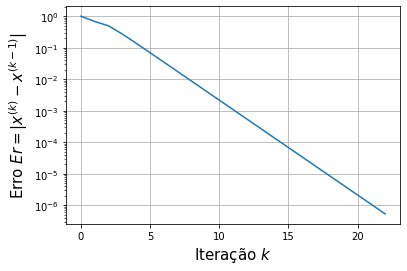

In [16]:
plt.semilogy(Er)
plt.grid()
plt.xlabel("Iteração $k$", fontdict={"size":15})
plt.ylabel("Erro $Er = |x^{(k)} - x^{(k-1)}|$", fontdict={"size":15})
plt.show()